In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from io import StringIO
import os
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/ppd.csv"
filePath = os.path.join(working_dir, data_path)

shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_dist,scaled_ppd,detonation
0,1.49,0.34,5-Ton TNT
1,1.72,0.44,5-Ton TNT
2,2.26,1.24,5-Ton TNT
3,2.26,1.24,5-Ton TNT
4,3.16,1.81,5-Ton TNT


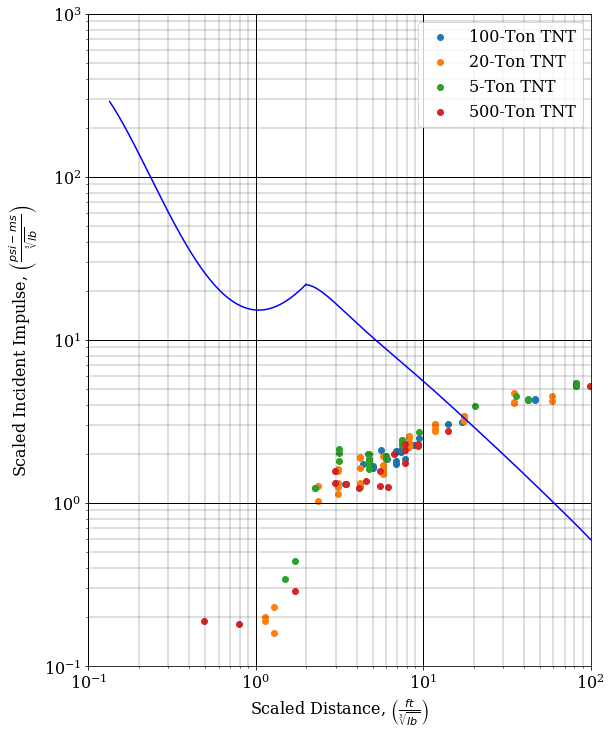

In [72]:
import matplotlib.pyplot as plt

import numpy as np
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

Blast = 'freeair'

if Blast == 'freeair':
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
else: #surface
    T = np.arange(0.17,2.42,0.01)
    TL = np.log10(T)
    U = (0.832468843425 + 3.0760329666*TL)   
    Y = 10**(1.57159240621 - 0.502992763686*U
        + 0.1713356452350*U**2 + 0.0450176963051*U**3
        - 0.0118964626402*U**4)

    S = np.arange(2.41,100.1,0.01)
    SL = np.log10(S)
    V = (-2.91358616806 + 2.40697745406*SL)
    X = 10**(0.719852655584 - 0.384519026965*V
        - 0.02601316706301*V**2 + 0.00595798753822*V**3
        + 0.01454452610700*V**4 - 0.00663289334734*V**5
        - 0.00284189327204*V**6 + 0.00136448162270*V**7)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(9, 12))

for c, shot_data in shot_data.groupby('detonation'):
    ax.scatter(shot_data.scaled_dist, shot_data.scaled_ppd, label=c)

ax.legend()
#ax.tick_params('both', length=10, width=1, which='minor')
plt.grid(b=True, which='major', lw = 1.0, color='black', linestyle='-')
plt.grid(b=True, which='minor', lw = 0.25, color='black', linestyle='-')
plt.ylim(0.1,1000)
plt.xlim(0.1,100)
plt.loglog(T,Y,color='b');
plt.loglog(S,X,color='b');
plt.ylabel(r'Scaled Incident Impulse, $\left(\frac{psi-ms}{\sqrt[3]{lb}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{\sqrt[3]{lb}}\right)$')
plt.show()